# Gradient Boosing Machines

# Model

In [13]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor

In [14]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [17]:
# GMB hem ağaca dayalı hem de linear bir yöntem olabilir. Biz bu kapsamda ağaca dayalı kullanıyor olacağız.

In [18]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [19]:
# learning_rate önemli bir parametre
# max_leaf_nodes
# n_estimators (GMB için min 1000 diye kabul edilir)

# Tahmin

In [20]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.777297656798

# Model Tuning

In [21]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [22]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2) #verbose-> iterasyon gözlemi bişiler
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=1; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.75; to

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [90]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [24]:
# final model

In [86]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2, 
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5,
                                      random_state = 42)

In [87]:
gbm_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200,
                          random_state=42, subsample=0.5)

In [88]:
y_pred = gbm_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

335.40862021023264

In [92]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

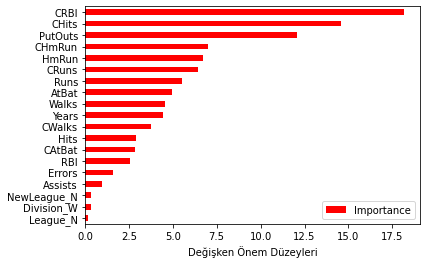

In [93]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")